In [1]:
import pandas as pd
import numpy as np

In [2]:
pm_map = pd.read_csv('../../data/a1/pm_bangkok_avg.csv')

In [3]:
pm_map

,date,avg
0,2011-05-16,44.000000
1,2011-05-17,45.000000
2,2011-05-18,45.000000
3,2011-05-19,49.000000
4,2011-05-20,43.000000
...,...,...
4741,2024-12-27,38.658333
4742,2024-12-28,24.716667
4743,2024-12-29,21.908333
4744,2024-12-30,31.600000


In [4]:
weather = pd.read_csv('../../data/weather/bangkok_weather.csv')

In [5]:
weather

,date,temperature_max,temperature_avg,temperature_min,dew_point_max,dew_point_avg,dew_point_min,humidity_max,humidity_avg,humidity_min,wind_speed_max,wind_speed_avg,wind_speed_min,pressure_max,pressure_avg,pressure_min,precipitation
0,2025-04-01,95.0,86.3,79.0,79.0,75.6,72.0,94.0,72.6,49.0,10.0,5.1,0.0,29.9,29.8,29.7,0.0
1,2025-04-02,95.0,87.4,82.0,79.0,72.7,66.0,89.0,63.7,41.0,12.0,6.5,2.0,29.9,29.8,29.8,0.0
2,2025-04-03,95.0,87.0,82.0,77.0,74.0,70.0,84.0,66.1,46.0,14.0,6.8,2.0,29.9,29.9,29.8,0.0
3,2025-04-04,93.0,86.4,82.0,77.0,74.8,73.0,84.0,69.1,52.0,15.0,7.7,2.0,29.9,29.8,29.7,0.0
4,2025-04-05,95.0,87.2,82.0,79.0,75.0,73.0,84.0,68.1,49.0,13.0,7.8,3.0,29.9,29.8,29.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9762,1997-01-27,84.0,77.0,73.0,70.0,66.6,64.0,88.0,71.1,55.0,10.0,5.4,0.0,30.0,29.9,29.9,0.0
9763,1997-01-28,91.0,81.7,72.0,68.0,66.2,64.0,88.0,62.3,41.0,6.0,2.6,0.0,30.0,29.9,29.8,0.0
9764,1997-01-29,95.0,84.2,73.0,68.0,63.7,59.0,69.0,52.2,32.0,10.0,2.1,0.0,29.9,26.9,0.0,0.0
9765,1997-01-30,95.0,83.0,73.0,75.0,71.6,70.0,94.0,70.6,49.0,8.0,1.7,0.0,29.8,29.8,29.7,0.0


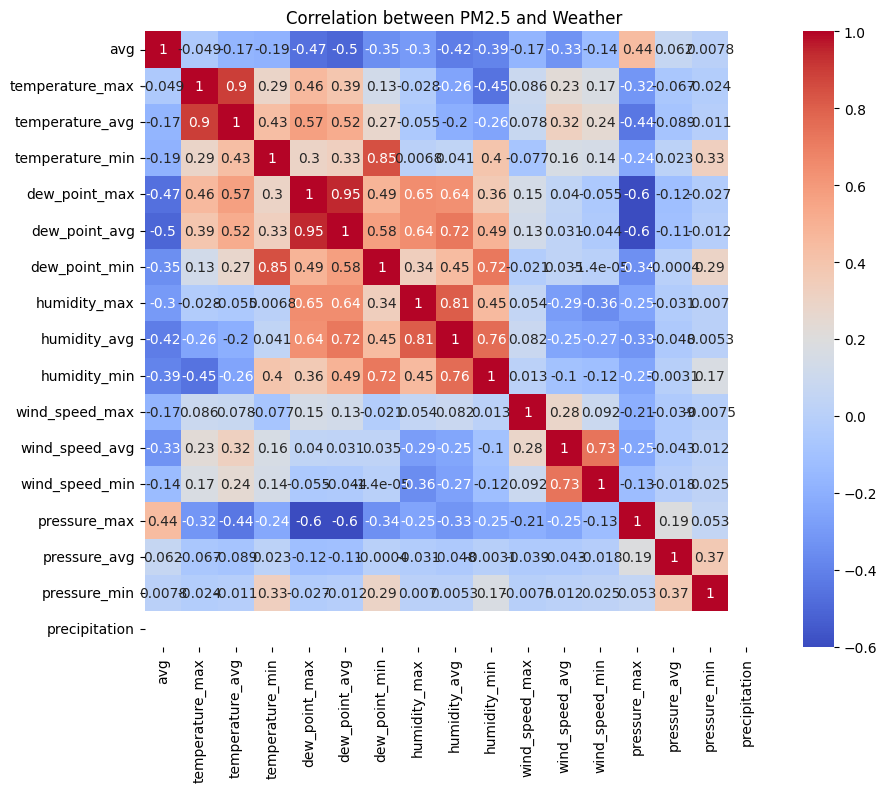

In [6]:
#now merge two dataframes and use date as index
pm_map['date'] = pd.to_datetime(pm_map['date'])
weather['date'] = pd.to_datetime(weather['date'])
pm_map.set_index('date', inplace=True)
weather.set_index('date', inplace=True)
pm_map = pm_map.merge(weather, left_index=True, right_index=True)
pm_map
#now we can see the correlation between pm2.5 and weather
pm_map.corr()

#plot the correlation
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(pm_map.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between PM2.5 and Weather')
plt.show()

In [7]:
pm_map

,avg,temperature_max,temperature_avg,temperature_min,dew_point_max,dew_point_avg,dew_point_min,humidity_max,humidity_avg,humidity_min,wind_speed_max,wind_speed_avg,wind_speed_min,pressure_max,pressure_avg,pressure_min,precipitation
date,,,,,,,,,,,,,,,,,
2011-05-16,44.000000,91.0,82.4,0.0,79.0,74.5,0.0,94.0,76.3,0.0,12.0,5.8,0.0,29.9,29.8,29.8,0.0
2011-05-17,45.000000,91.0,85.5,79.0,79.0,76.6,73.0,94.0,75.8,59.0,14.0,4.9,0.0,29.9,29.8,29.7,0.0
2011-05-18,45.000000,91.0,83.1,75.0,79.0,74.9,72.0,94.0,77.9,52.0,9.0,5.9,2.0,29.9,29.8,29.7,0.0
2011-05-19,49.000000,95.0,82.7,0.0,77.0,72.0,0.0,89.0,70.4,0.0,16.0,5.2,0.0,29.8,29.1,0.0,0.0
2011-05-20,43.000000,93.0,85.7,77.0,77.0,72.4,68.0,94.0,67.5,44.0,12.0,5.8,0.0,29.8,29.7,29.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,38.658333,91.0,84.2,77.0,70.0,67.2,66.0,69.0,57.2,43.0,12.0,5.5,0.0,30.0,29.9,29.8,0.0
2024-12-28,24.716667,88.0,82.7,77.0,68.0,66.3,64.0,69.0,58.6,49.0,12.0,6.3,3.0,30.0,29.9,29.9,0.0
2024-12-29,21.908333,88.0,79.3,73.0,64.0,62.7,59.0,73.0,56.8,43.0,9.0,6.2,2.0,30.1,29.9,29.9,0.0


/var/folders/yz/zvlp09kd3l12735_165qzk0c0000gn/T/ipykernel_3254/2955062762.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pm_map['humidity_avg'].resample('M').mean().plot()


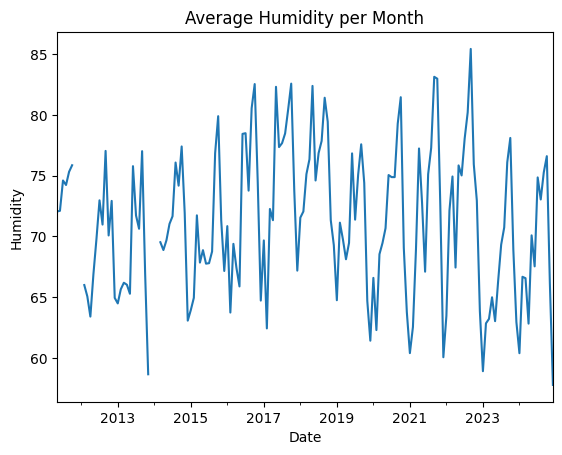

In [8]:
# plot column humidity_avg as time series and resample as monthly
pm_map['humidity_avg'].resample('M').mean().plot()
plt.title('Average Humidity per Month')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.show()

In [9]:
import pandas as pd

# Step 1: Compute correlation matrix
correlation_matrix = pm_map.corr(numeric_only=True)

# Step 2: Get correlation of each feature with the target (e.g., 'humidity_avg')
target_corr = correlation_matrix['avg'].drop('avg')

# Step 3: Select features with strong correlation (positive or negative)
selected_features = target_corr[abs(target_corr) > 0.3].index.tolist()

# Optional: See correlation values
print(target_corr[abs(target_corr) > 0.3])


dew_point_max    -0.466494
dew_point_avg    -0.504029
dew_point_min    -0.350572
humidity_avg     -0.419543
humidity_min     -0.391562
wind_speed_avg   -0.328409
pressure_max      0.444849
Name: avg, dtype: float64


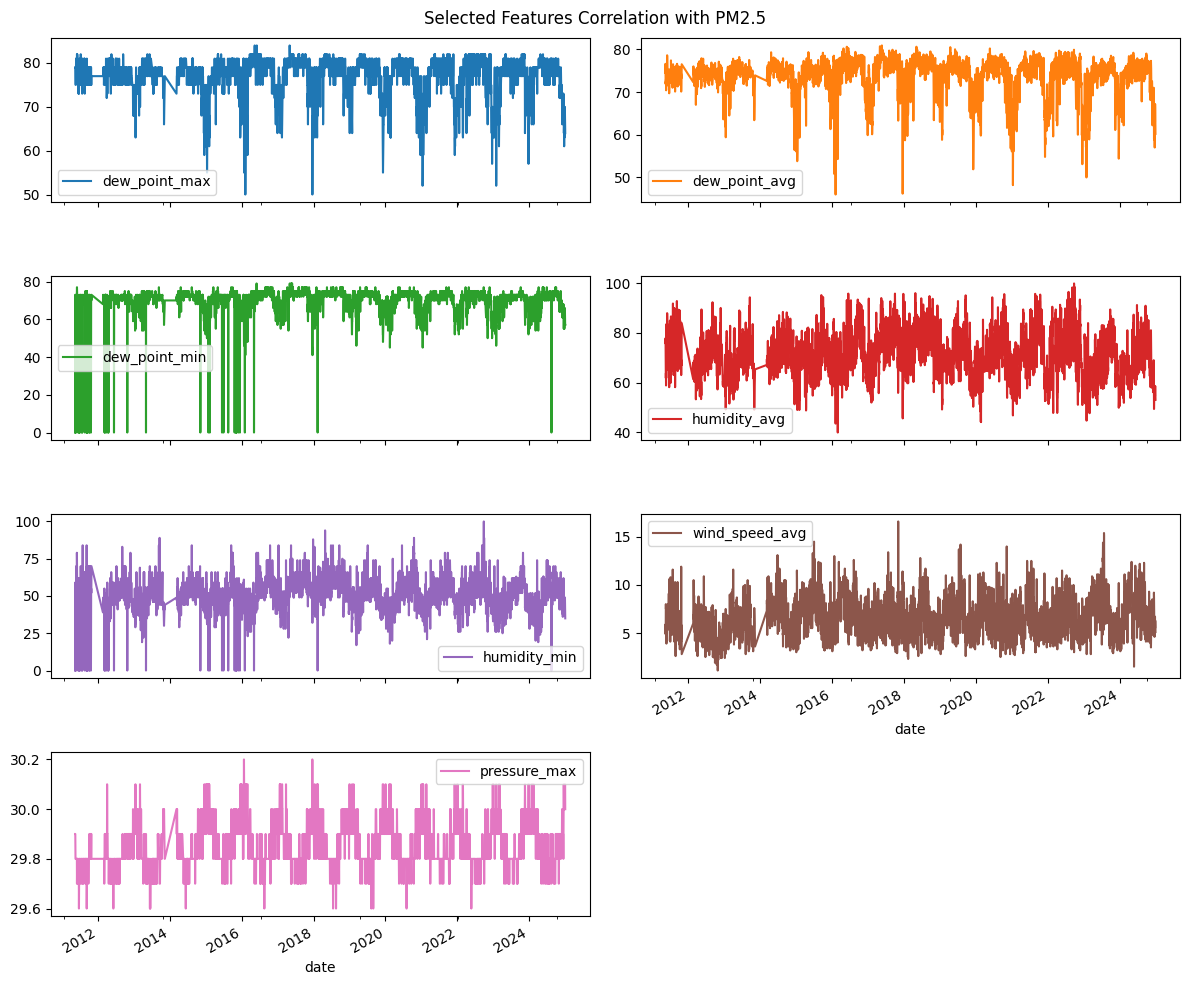

In [10]:
selected_features = [
    'dew_point_max',
    'dew_point_avg',
    'dew_point_min',
    'humidity_avg',
    'humidity_min',
    'wind_speed_avg',
    'pressure_max'
]

import matplotlib.pyplot as plt

# Ensure your index is datetime for time series plotting
pm_map.index = pd.to_datetime(pm_map.index)

# Plot each selected feature as a subplot
pm_map[selected_features].plot(
    subplots=True,
    figsize=(12, 10),
    layout=(4, 2),  # Adjust based on number of plots (7 → 4 rows x 2 columns)
    title='Selected Features Correlation with PM2.5'
)

plt.tight_layout()
plt.show()

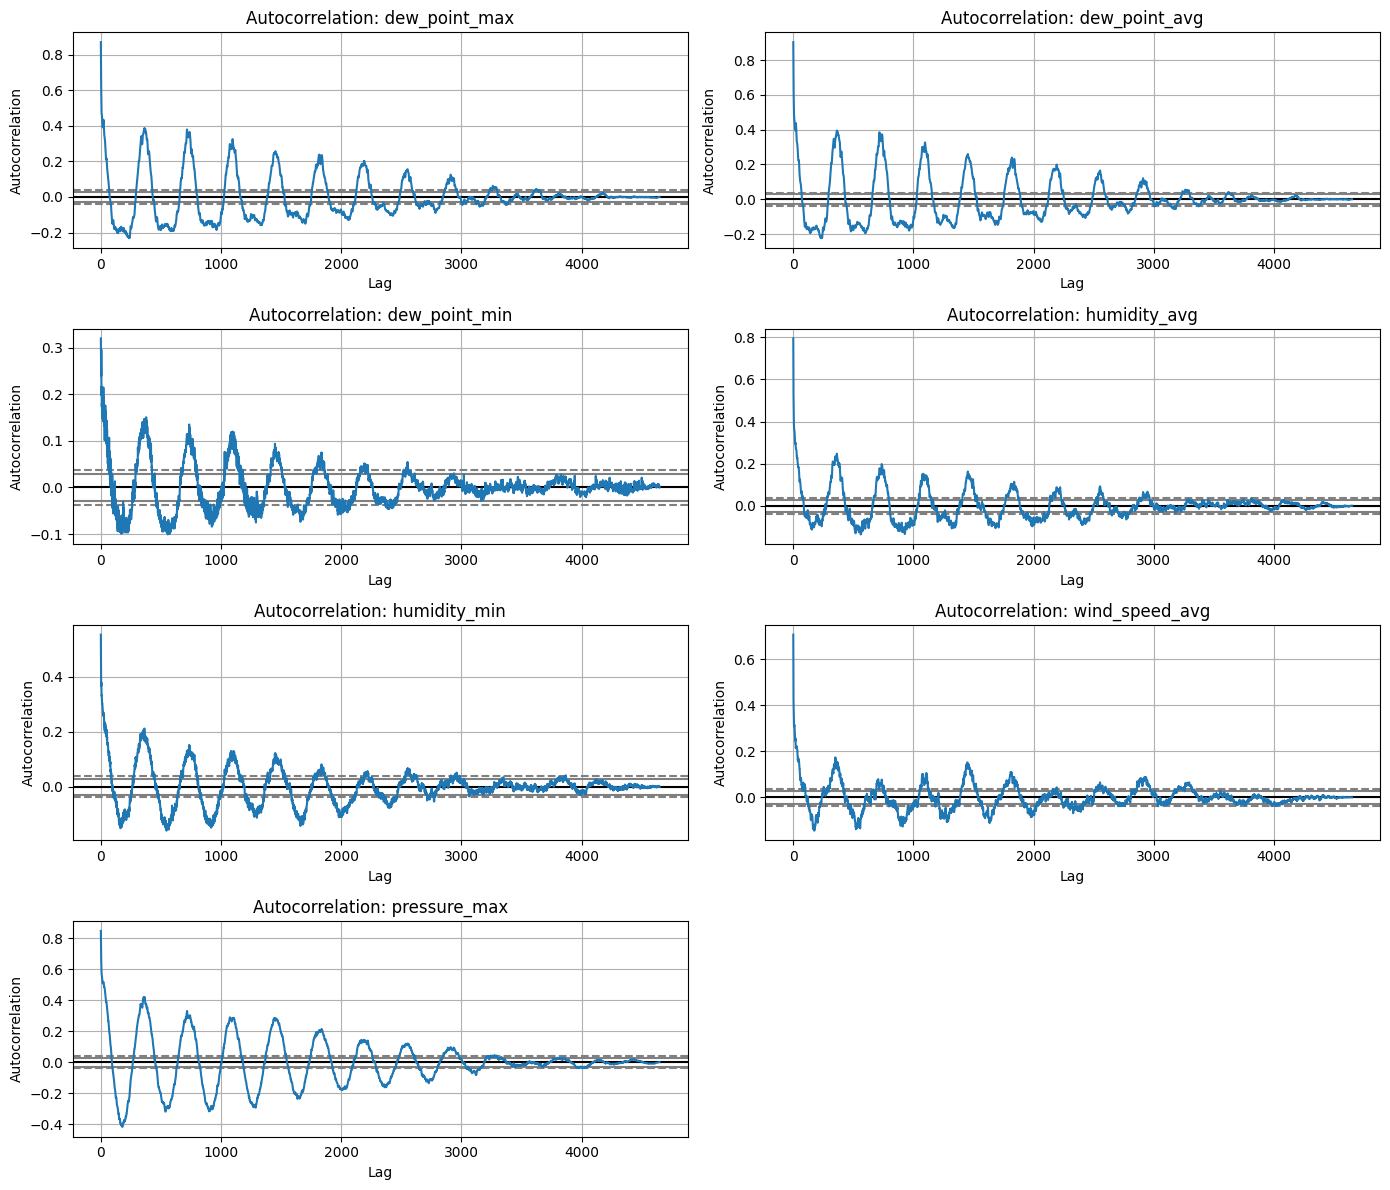

In [11]:
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 12))
axes = axes.flatten()

# Plot autocorrelation for each feature
for i, feature in enumerate(selected_features):
    autocorrelation_plot(pm_map[feature].dropna(), ax=axes[i])
    axes[i].set_title(f'Autocorrelation: {feature}')

# Hide unused subplot if any
for j in range(len(selected_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [12]:
# selected_features = [
#     'dew_point_max',
#     'dew_point_avg',
#     'dew_point_min',
#     'humidity_avg',
#     'humidity_min',
#     'wind_speed_avg',
#     'pressure_max'
# ]

display(pm_map['dew_point_max'])

date
2011-05-16    79.0
2011-05-17    79.0
2011-05-18    79.0
2011-05-19    77.0
2011-05-20    77.0
              ... 
2024-12-27    70.0
2024-12-28    68.0
2024-12-29    64.0
2024-12-30    64.0
2024-12-31    64.0
Name: dew_point_max, Length: 4648, dtype: float64

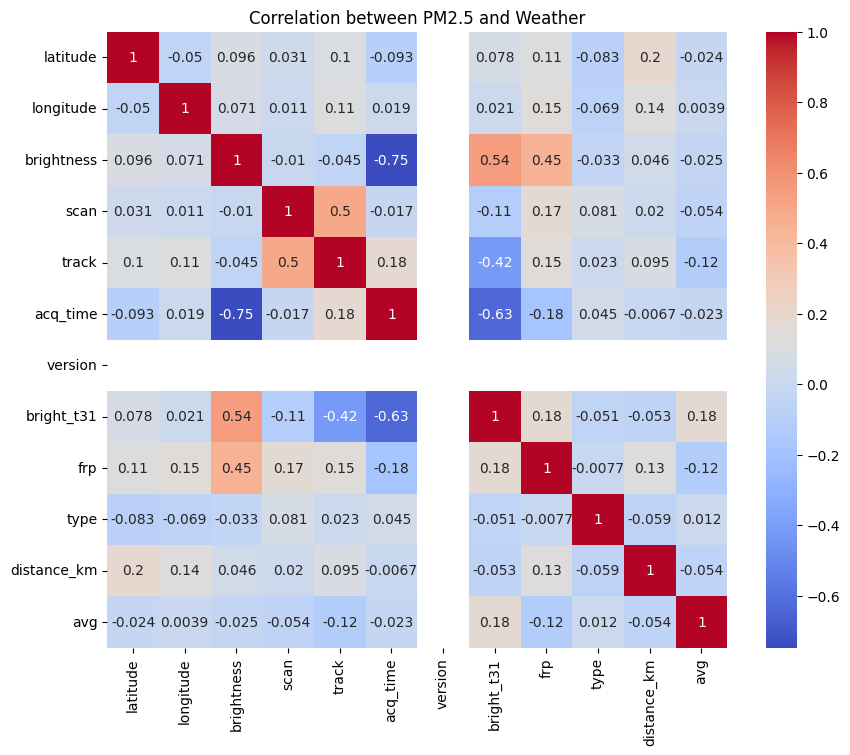

In [13]:
#now merge pm_map with bkk_firemap
bkk_fire = pd.read_csv('../../data/a1/bkk_firemap.csv')
pm_map = pd.read_csv('../../data/a1/pm_bangkok_avg.csv')

# Ensure the correct datetime column is used
bkk_fire['acq_date'] = pd.to_datetime(bkk_fire['acq_date'])
pm_map['date'] = pd.to_datetime(pm_map['date'])

# Set the datetime columns as index
bkk_fire.set_index('acq_date', inplace=True)
pm_map.set_index('date', inplace=True)

# Merge the two dataframes on their datetime index
bkk_fire = bkk_fire.merge(pm_map, left_index=True, right_index=True)

# Display the merged dataframe
bkk_fire

# Now we can see the correlation between pm2.5 and weather
# Exclude non-numeric columns
numeric_bkk_fire = bkk_fire.select_dtypes(include=[np.number])
numeric_bkk_fire.corr()

# Plot the correlation
plt.figure(figsize=(10, 8))
# Compute correlation only for numeric columns
numeric_bkk_fire = bkk_fire.select_dtypes(include=[np.number])
sns.heatmap(numeric_bkk_fire.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between PM2.5 and Weather')
plt.show()

In [14]:
bkk_fire

,latitude,longitude,brightness,scan,track,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,acq_datetime,distance_km,avg
2018-04-03,13.87908,100.35175,334.48,0.60,0.53,706,N20,VIIRS,n,2,293.33,4.22,D,0,2018-04-03 07:06:00,25.081270,41.200000
2018-04-06,13.84944,100.34994,331.50,0.46,0.47,609,N20,VIIRS,n,2,297.56,2.99,D,0,2018-04-06 06:09:00,23.162043,40.200000
2018-04-06,13.77165,100.59980,330.59,0.45,0.47,609,N20,VIIRS,n,2,294.07,3.88,D,0,2018-04-06 06:09:00,9.512107,40.200000
2018-04-11,13.60762,100.71412,332.99,0.53,0.42,615,N20,VIIRS,n,2,301.01,2.78,D,0,2018-04-11 06:15:00,24.500599,25.000000
2018-04-11,13.62025,100.74191,333.21,0.53,0.42,615,N20,VIIRS,n,2,301.67,6.15,D,0,2018-04-11 06:15:00,26.399810,25.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-02,13.57769,100.54063,334.33,0.40,0.37,627,N20,VIIRS,n,2,295.94,1.52,D,0,2024-10-02 06:27:00,16.797063,11.444444
2024-10-07,13.61015,100.55387,346.56,0.38,0.36,633,N20,VIIRS,n,2,296.34,3.16,D,0,2024-10-07 06:33:00,13.481424,28.500000
2024-11-03,13.66605,100.58886,341.19,0.40,0.37,627,N20,VIIRS,n,2,298.58,2.32,D,0,2024-11-03 06:27:00,9.808326,26.010000
2024-11-03,13.66098,100.57847,335.96,0.40,0.37,627,N20,VIIRS,n,2,298.76,2.30,D,0,2024-11-03 06:27:00,9.478153,26.010000


In [15]:
pm_map

,avg
date,
2011-05-16,44.000000
2011-05-17,45.000000
2011-05-18,45.000000
2011-05-19,49.000000
2011-05-20,43.000000
...,...
2024-12-27,38.658333
2024-12-28,24.716667
2024-12-29,21.908333


In [16]:
numeric_bkk_fire

,latitude,longitude,brightness,scan,track,acq_time,version,bright_t31,frp,type,distance_km,avg
2018-04-03,13.87908,100.35175,334.48,0.60,0.53,706,2,293.33,4.22,0,25.081270,41.200000
2018-04-06,13.84944,100.34994,331.50,0.46,0.47,609,2,297.56,2.99,0,23.162043,40.200000
2018-04-06,13.77165,100.59980,330.59,0.45,0.47,609,2,294.07,3.88,0,9.512107,40.200000
2018-04-11,13.60762,100.71412,332.99,0.53,0.42,615,2,301.01,2.78,0,24.500599,25.000000
2018-04-11,13.62025,100.74191,333.21,0.53,0.42,615,2,301.67,6.15,0,26.399810,25.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-02,13.57769,100.54063,334.33,0.40,0.37,627,2,295.94,1.52,0,16.797063,11.444444
2024-10-07,13.61015,100.55387,346.56,0.38,0.36,633,2,296.34,3.16,0,13.481424,28.500000
2024-11-03,13.66605,100.58886,341.19,0.40,0.37,627,2,298.58,2.32,0,9.808326,26.010000
2024-11-03,13.66098,100.57847,335.96,0.40,0.37,627,2,298.76,2.30,0,9.478153,26.010000


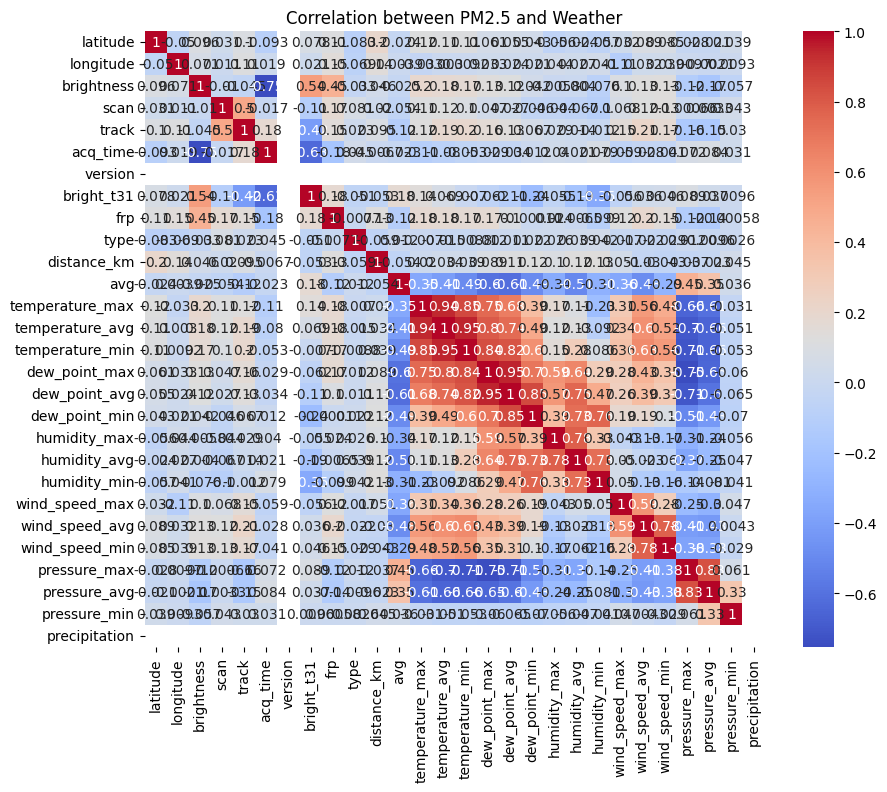

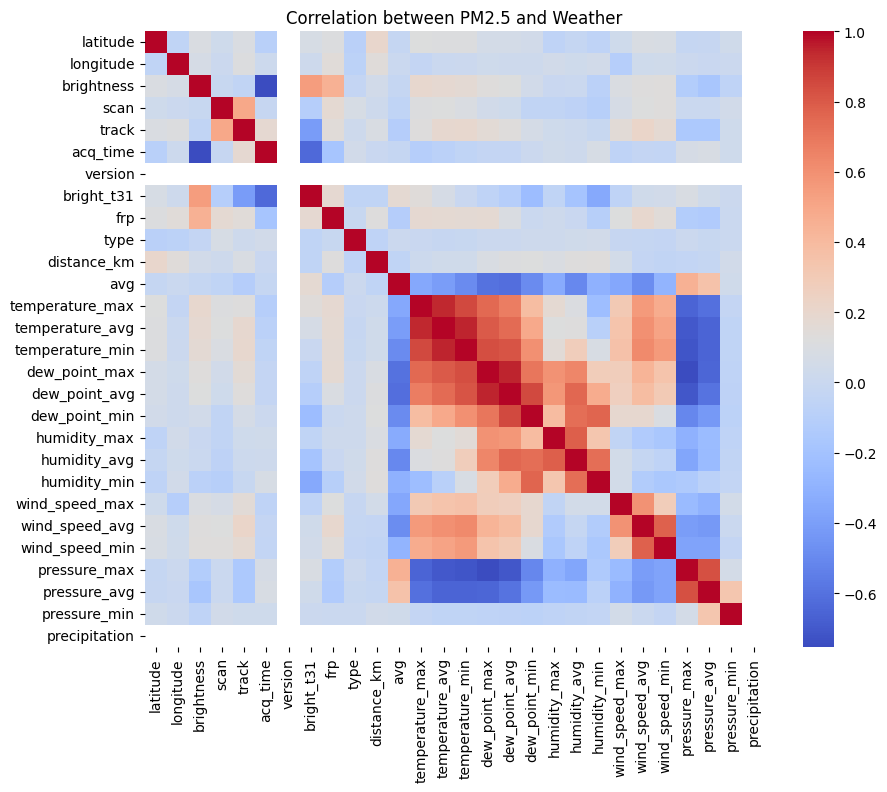

In [17]:
# merge the merged dataframe with weather
bkk_fire = bkk_fire.merge(weather, left_index=True, right_index=True)
bkk_fire
# Now we can see the correlation between pm2.5 and weather
# Exclude non-numeric columns
numeric_bkk_fire = bkk_fire.select_dtypes(include=[np.number])
numeric_bkk_fire.corr()
# Plot the correlation
plt.figure(figsize=(10, 8))
# Compute correlation only for numeric columns
numeric_bkk_fire = bkk_fire.select_dtypes(include=[np.number])
sns.heatmap(numeric_bkk_fire.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between PM2.5 and Weather')

# plot only color
plt.figure(figsize=(10, 8))
# Compute correlation only for numeric columns
numeric_bkk_fire = bkk_fire.select_dtypes(include=[np.number])
sns.heatmap(numeric_bkk_fire.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation between PM2.5 and Weather')
plt.show()

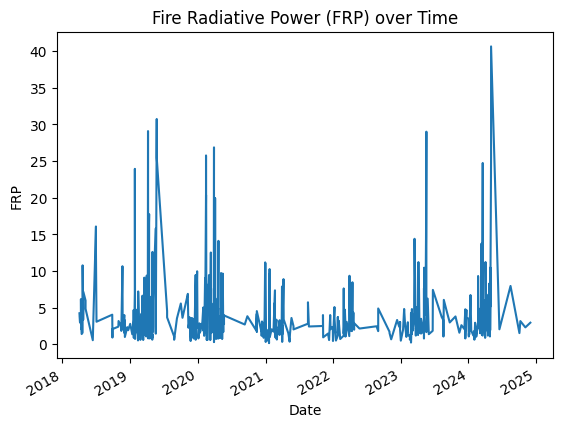

In [18]:
#plot frp from bkk_fire as time series
bkk_fire['frp'].plot()
plt.title('Fire Radiative Power (FRP) over Time')
plt.xlabel('Date')
plt.ylabel('FRP')
plt.show()